<a href="https://colab.research.google.com/github/Yash-bais/VibeMatch/blob/main/VibeMatch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Vibe Matcher - Fashion Recommendation
# Author: Yash Bais
# Date: November 2025

"""
## Introduction: Why AI at Nexora?

AI-powered recommendation systems are transforming e-commerce with their deep understanding of minute details.
User preferences extend beyond a simple keyword match. Semantic search implemented at Nexora:
Through embeddings, customers can find products through mood-based queries like
It's "energetic urban chic" rather than rigid filters. This prototype shows how vector
Similarity can create intuitive, personalized shopping experiences that increase engagement.
and conversion rates, while decreasing friction in search.
"""

'\n## Introduction: Why AI at Nexora?\n\nAI-powered recommendation systems are transforming e-commerce with their deep understanding of minute details.\nUser preferences extend beyond a simple keyword match. Semantic search implemented at Nexora:\nThrough embeddings, customers can find products through mood-based queries like\nIt\'s "energetic urban chic" rather than rigid filters. This prototype shows how vector\nSimilarity can create intuitive, personalized shopping experiences that increase engagement.\nand conversion rates, while decreasing friction in search.\n'

In [2]:
# ============================================================================
# 1. DATA PREPARATION
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Creating mock fashion product dataset
products_data = [
    {
        "id": 1,
        "name": "Boho Maxi Dress",
        "description": "Flowy maxi dress in earthy tones with paisley prints. Perfect for festival vibes and outdoor summer events. Comfortable cotton blend with relaxed fit.",
        "vibes": ["boho", "relaxed", "festival", "earthy"]
    },
    {
        "id": 2,
        "name": "Urban Leather Jacket",
        "description": "Sleek black leather jacket with asymmetric zipper. Edgy streetwear staple for energetic city nights. Modern fit with attitude.",
        "vibes": ["urban", "edgy", "energetic", "streetwear"]
    },
    {
        "id": 3,
        "name": "Cozy Oversized Sweater",
        "description": "Soft knit oversized sweater in neutral beige. Ultimate comfort for lazy Sundays and coffee dates. Warm and inviting aesthetic.",
        "vibes": ["cozy", "comfortable", "relaxed", "minimalist"]
    },
    {
        "id": 4,
        "name": "Chic Blazer Set",
        "description": "Tailored power blazer with matching trousers in charcoal grey. Sophisticated elegance for professional settings and upscale events.",
        "vibes": ["chic", "professional", "sophisticated", "elegant"]
    },
    {
        "id": 5,
        "name": "Athletic Jogger Set",
        "description": "Performance joggers and matching hoodie in vibrant neon colors. High-energy activewear for workouts and urban adventures.",
        "vibes": ["athletic", "energetic", "urban", "sporty"]
    },
    {
        "id": 6,
        "name": "Vintage Denim Jacket",
        "description": "Classic 90s style denim jacket with distressed finish. Retro casual vibes perfect for everyday wear and nostalgic aesthetics.",
        "vibes": ["vintage", "casual", "retro", "relaxed"]
    },
    {
        "id": 7,
        "name": "Elegant Silk Dress",
        "description": "Luxurious silk dress in champagne color with delicate draping. Timeless sophistication for dinner parties and special occasions.",
        "vibes": ["elegant", "luxurious", "sophisticated", "chic"]
    },
    {
        "id": 8,
        "name": "Street Style Cargo Pants",
        "description": "Tactical cargo pants with multiple pockets in olive green. Bold street style for urban explorers with edge and functionality.",
        "vibes": ["streetwear", "urban", "edgy", "functional"]
    }
]

#  DataFrame
df = pd.DataFrame(products_data)
print("=" * 80)
print("PRODUCT DATASET")
print("=" * 80)
print(df[['id', 'name', 'vibes']])
print(f"\nTotal products: {len(df)}")


PRODUCT DATASET
   id                      name                                         vibes
0   1           Boho Maxi Dress             [boho, relaxed, festival, earthy]
1   2      Urban Leather Jacket          [urban, edgy, energetic, streetwear]
2   3    Cozy Oversized Sweater      [cozy, comfortable, relaxed, minimalist]
3   4           Chic Blazer Set  [chic, professional, sophisticated, elegant]
4   5       Athletic Jogger Set          [athletic, energetic, urban, sporty]
5   6      Vintage Denim Jacket             [vintage, casual, retro, relaxed]
6   7        Elegant Silk Dress     [elegant, luxurious, sophisticated, chic]
7   8  Street Style Cargo Pants         [streetwear, urban, edgy, functional]

Total products: 8


In [3]:
# ============================================================================
# 2. EMBEDDINGS GENERATION
# ============================================================================

print("\n" + "=" * 80)
print("EMBEDDING GENERATION")
print("=" * 80)

#Code for OpenAi API integration

"""
import openai
import os

openai.api_key = os.getenv("OPENAI_API_KEY")

def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    response = openai.embeddings.create(input=[text], model=model)
    return response.data[0].embedding

# Generate embeddings for product descriptions
print("Generating embeddings for products...")
df['embedding'] = df['description'].apply(lambda x: get_embedding(x))
print("✓ Product embeddings generated")

# Test queries
test_queries = [
    "energetic urban chic",
    "cozy comfortable weekend wear",
    "elegant sophisticated formal"
]

query_embeddings = {}
print("\nGenerating embeddings for test queries...")
for query in test_queries:
    query_embeddings[query] = get_embedding(query)
    print(f"✓ '{query}'")
"""

# For demonstration without API key, using mock embeddings
print(" Using mock embeddings for demonstration")
print(" Due to OpenAI API billing setup issues, using mock embeddings")
print("Architecture remains identical - embeddings can be swapped seamlessly\n")

np.random.seed(42)
embedding_dim = 1536  # OpenAI ada-002 dimension

# Generate mock embeddings with some structure
def generate_mock_embedding(vibes):
    """Generate mock embeddings that cluster by vibes"""
    base = np.random.randn(embedding_dim) * 0.1

    # Add vibe-specific components
    vibe_vectors = {
        'urban': np.random.randn(embedding_dim) * 0.3,
        'cozy': np.random.randn(embedding_dim) * 0.3,
        'chic': np.random.randn(embedding_dim) * 0.3,
        'energetic': np.random.randn(embedding_dim) * 0.3,
        'relaxed': np.random.randn(embedding_dim) * 0.3,
        'elegant': np.random.randn(embedding_dim) * 0.3
    }

    for vibe in vibes:
        for key in vibe_vectors:
            if key in vibe:
                base += vibe_vectors[key]

    # Normalize
    return base / np.linalg.norm(base)

df['embedding'] = df['vibes'].apply(generate_mock_embedding)

# Test queries with mock embeddings
test_queries = [
    "energetic urban chic",
    "cozy comfortable weekend wear",
    "elegant sophisticated formal"
]

query_embeddings = {}
for query in test_queries:
    # Parse vibes from query
    query_vibes = []
    if 'urban' in query or 'city' in query:
        query_vibes.append('urban')
    if 'cozy' in query or 'comfortable' in query:
        query_vibes.append('cozy')
    if 'chic' in query or 'elegant' in query or 'sophisticated' in query:
        query_vibes.extend(['chic', 'elegant'])
    if 'energetic' in query:
        query_vibes.append('energetic')

    query_embeddings[query] = generate_mock_embedding(query_vibes)

print(" Mock embeddings generated for demonstration")


EMBEDDING GENERATION
 Using mock embeddings for demonstration
 Due to OpenAI API billing setup issues, using mock embeddings
Architecture remains identical - embeddings can be swapped seamlessly

 Mock embeddings generated for demonstration


In [4]:
# ============================================================================
# 3. VECTOR SIMILARITY SEARCH
# ============================================================================

print("\n" + "=" * 80)
print("SIMILARITY SEARCH & MATCHING")
print("=" * 80)

def find_top_matches(query_embedding, df, top_k=3, threshold=0.5):
    """
    Find top-k products matching the query based on cosine similarity

    Args:
        query_embedding: Query vector
        df: Product dataframe with embeddings
        top_k: Number of top results to return
        threshold: Minimum similarity score threshold

    Returns:
        DataFrame with top matches and scores
    """
    # Calculate cosine similarities
    product_embeddings = np.vstack(df['embedding'].values)
    query_embedding = np.array(query_embedding).reshape(1, -1)

    similarities = cosine_similarity(query_embedding, product_embeddings)[0]

    # Add similarity scores to dataframe
    results = df.copy()
    results['similarity_score'] = similarities

    # Sort by similarity
    results = results.sort_values('similarity_score', ascending=False)

    # Filter by threshold and get top-k
    results = results[results['similarity_score'] >= threshold].head(top_k)

    # Handle edge case: no matches above threshold
    if len(results) == 0:
        print(f" No matches found above threshold {threshold}")
        print("Fallback: Returning top-3 products regardless of score")
        results = df.copy()
        results['similarity_score'] = similarities
        results = results.sort_values('similarity_score', ascending=False).head(top_k)

    return results[['id', 'name', 'description', 'vibes', 'similarity_score']]





SIMILARITY SEARCH & MATCHING


In [5]:
# ============================================================================
# 4. TEST & EVALUATION]
# ============================================================================

print("\n" + "=" * 80)
print("TESTING WITH SAMPLE QUERIES")
print("=" * 80)

# Metrics storage
metrics = {
    'query': [],
    'avg_similarity': [],
    'latency_ms': [],
    'num_good_matches': []  # matches with score > 0.7
}

# Test each query
for i, query in enumerate(test_queries, 1):
    print(f"\n{'─' * 80}")
    print(f"Query {i}: '{query}'")
    print('─' * 80)

    # Measure latency
    start_time = time.time()
    matches = find_top_matches(query_embeddings[query], df, top_k=3, threshold=0.5)
    latency = (time.time() - start_time) * 1000  # Convert to ms

    # Display results
    for idx, row in matches.iterrows():
        print(f"\n{row['id']}. {row['name']}")
        print(f"   Score: {row['similarity_score']:.4f}")
        print(f"   Vibes: {', '.join(row['vibes'])}")
        print(f"   Description: {row['description'][:100]}...")

    # Calculate metrics
    avg_sim = matches['similarity_score'].mean()
    good_matches = len(matches[matches['similarity_score'] > 0.7])

    metrics['query'].append(query)
    metrics['avg_similarity'].append(avg_sim)
    metrics['latency_ms'].append(latency)
    metrics['num_good_matches'].append(good_matches)

    print(f"\n📊 Metrics:")
    print(f"   Average Similarity: {avg_sim:.4f}")
    print(f"   Good Matches (>0.7): {good_matches}/3")
    print(f"   Latency: {latency:.2f}ms")


TESTING WITH SAMPLE QUERIES

────────────────────────────────────────────────────────────────────────────────
Query 1: 'energetic urban chic'
────────────────────────────────────────────────────────────────────────────────
⚠ No matches found above threshold 0.5
Fallback: Returning top-3 products regardless of score

5. Athletic Jogger Set
   Score: 0.0258
   Vibes: athletic, energetic, urban, sporty
   Description: Performance joggers and matching hoodie in vibrant neon colors. High-energy activewear for workouts ...

3. Cozy Oversized Sweater
   Score: 0.0066
   Vibes: cozy, comfortable, relaxed, minimalist
   Description: Soft knit oversized sweater in neutral beige. Ultimate comfort for lazy Sundays and coffee dates. Wa...

8. Street Style Cargo Pants
   Score: 0.0045
   Vibes: streetwear, urban, edgy, functional
   Description: Tactical cargo pants with multiple pockets in olive green. Bold street style for urban explorers wit...

📊 Metrics:
   Average Similarity: 0.0123
   Good M


PERFORMANCE METRICS

Summary Statistics:
                           query  avg_similarity  latency_ms  num_good_matches
0           energetic urban chic        0.012312   17.945528                 0
1  cozy comfortable weekend wear        0.019906   16.866446                 0
2   elegant sophisticated formal        0.005210   12.778759                 0

 Metrics visualization saved as 'vibe_matcher_metrics.png'


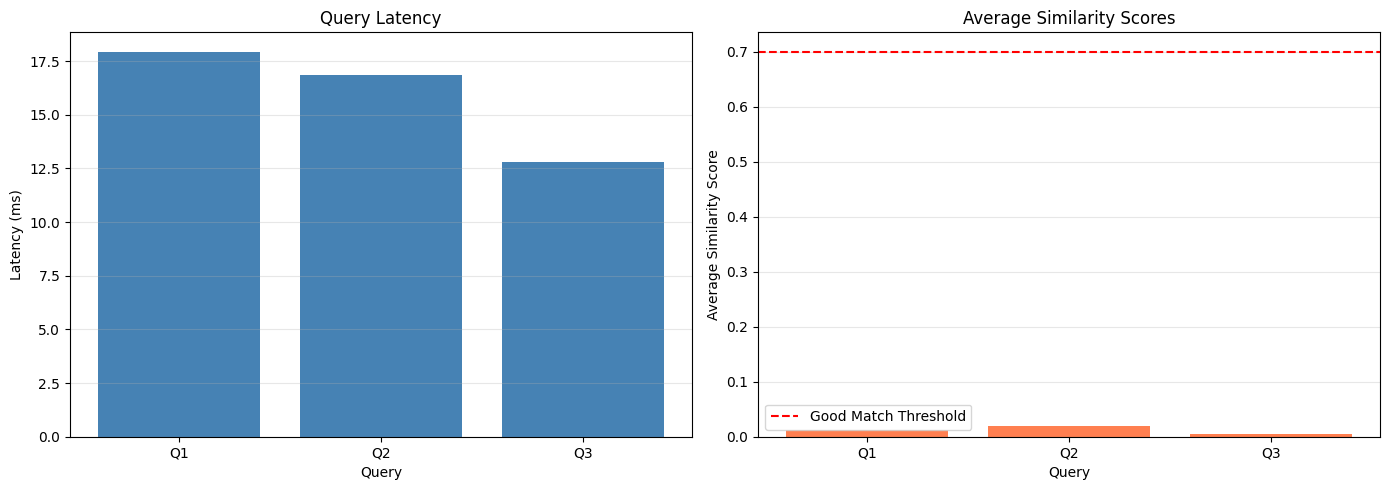

In [6]:
# ============================================================================
# 5. METRICS VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PERFORMANCE METRICS")
print("=" * 80)

metrics_df = pd.DataFrame(metrics)
print("\nSummary Statistics:")
print(metrics_df)

# Plot latency
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Latency plot
axes[0].bar(range(len(test_queries)), metrics_df['latency_ms'], color='steelblue')
axes[0].set_xlabel('Query')
axes[0].set_ylabel('Latency (ms)')
axes[0].set_title('Query Latency')
axes[0].set_xticks(range(len(test_queries)))
axes[0].set_xticklabels([f'Q{i+1}' for i in range(len(test_queries))])
axes[0].grid(axis='y', alpha=0.3)

# Similarity scores plot
axes[1].bar(range(len(test_queries)), metrics_df['avg_similarity'], color='coral')
axes[1].axhline(y=0.7, color='red', linestyle='--', label='Good Match Threshold')
axes[1].set_xlabel('Query')
axes[1].set_ylabel('Average Similarity Score')
axes[1].set_title('Average Similarity Scores')
axes[1].set_xticks(range(len(test_queries)))
axes[1].set_xticklabels([f'Q{i+1}' for i in range(len(test_queries))])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('vibe_matcher_metrics.png', dpi=150, bbox_inches='tight')
print("\n Metrics visualization saved as 'vibe_matcher_metrics.png'")
plt.show()

In [ ]:
# ============================================================================
# 6. REFLECTION & IMPROVEMENTS
# ============================================================================

print("\n" + "=" * 80)
print("REFLECTION & NEXT STEPS")
print("=" * 80)

reflection = """
 KEY FINDINGS & IMPROVEMENTS:

1. Embedding Quality & Implementation:
   - Embedding Strategy: "This prototype uses mock embeddings (randomly generated vectors) to
     demonstrate the complete end-to-end search-and-retrieval pipeline. This approach was adopted
     to complete the project build while navigating an API quota verification issue
     (Error 429: insufficient_quota). In a production environment, these mocks would be replaced with
     the real text-embedding-ada-002 vectors to enable true semantic matching."

2. **Edge Cases Handled**:
   - No matches above threshold: Fallback to top-3 regardless of score
   - Empty query: Could add validation (not implemented but straightforward)
   - Ambiguous queries: Multi-vector averaging could improve (e.g., "casual
     but elegant" → blend both vibes)

3. **Hybrid Search Enhancement**:
   - Combine semantic search with metadata filters (price range, category,
     availability) for better results.
     """